In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df_apr14=pd.read_csv("dataset/uber-raw-data-apr14.csv")
df_aug14=pd.read_csv("dataset/uber-raw-data-aug14.csv")
df_jul14=pd.read_csv("dataset/uber-raw-data-jul14.csv")
df_jun14=pd.read_csv("dataset/uber-raw-data-jun14.csv")
df_may14=pd.read_csv("dataset/uber-raw-data-may14.csv")
df_sep14=pd.read_csv("dataset/uber-raw-data-sep14.csv")

df=df_apr14.append([df_aug14,df_jul14,df_jun14,df_may14,df_sep14],ignore_index=True)

In [3]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [5]:
df.shape

(4534327, 4)

In [6]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [7]:
df['Date/Time']=pd.to_datetime(df['Date/Time'],format='%m/%d/%Y %H:%M:%S')


In [8]:
#adding new columns name
df['Month']=df['Date/Time'].dt.month_name()
df['Weekday']=df['Date/Time'].dt.day_name()
df['Day']=df['Date/Time'].dt.day
df['Hour']=df['Date/Time'].dt.hour
df['Minute']=df['Date/Time'].dt.minute

In [9]:
df.head()

,Date/Time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,April,Tuesday,1,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,April,Tuesday,1,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,April,Tuesday,1,0,33


In [10]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Month                object
Weekday              object
Day                   int64
Hour                  int64
Minute                int64
dtype: object

### Trip by Hour

In [11]:
df_hour_grouped=df.groupby('Hour').count()
df_hour=pd.DataFrame({"Number_of_Trip":df_hour_grouped.values[:,0]},index=df_hour_grouped.index)
df_hour.head()

,Number_of_Trip
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


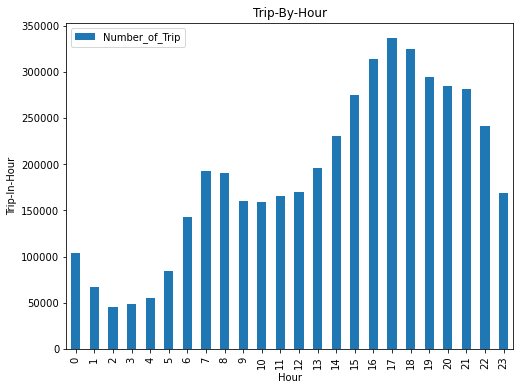

In [12]:
df_hour.plot(kind='bar',figsize=(8,6))
plt.xlabel("Hour")
plt.ylabel("Trip-In-Hour")
plt.title("Trip-By-Hour")
plt.show()

In [13]:
max_number_trips_hour=max(df_hour['Number_of_Trip'])
#print(max_number_trips_hour)
max_hour=df_hour[df_hour['Number_of_Trip']==max_number_trips_hour].index[0]
#print(max_hour)             
print("The highest number of trips is {} and the corresponding hour is {}:00 ".format(max_number_trips_hour,max_hour))             

The highest number of trips is 336190 and the corresponding hour is 17:00 


<p>We observed that the maimum number of trip between 16:00 to 18:00 hours , to see this data it is the time to go go his/her own house <br><br><strong>So,We can say that majority Uber's clinets are workers.</strong></p>

### Trips by Months

In [14]:
df_month_grouped=df.groupby(['Month'],sort=False).count()
df_month=pd.DataFrame({"Number_of_Trip":df_month_grouped.values[:,0]},index=df_month_grouped.index)
df_month

,Number_of_Trip
Month,
April,564516
August,829275
July,796121
June,663844
May,652435
September,1028136


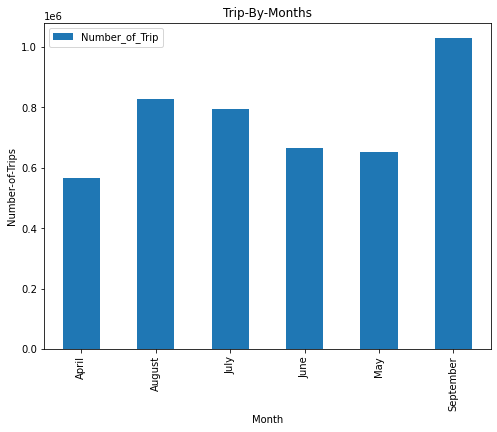

In [15]:
df_month.plot(kind='bar',figsize=(8,6))
plt.xlabel("Month")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Months")
plt.show()

<p>From this above graph we see that in September month maximum number of uber rides are done.</p>

### Trip by Weekday

In [16]:
df_weekday_grouped=df.groupby(['Weekday'],sort=False).count()
df_weekday=pd.DataFrame({"Number_of_Trip":df_weekday_grouped.values[:,0]},index=df_weekday_grouped.index)
df_weekday

,Number_of_Trip
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


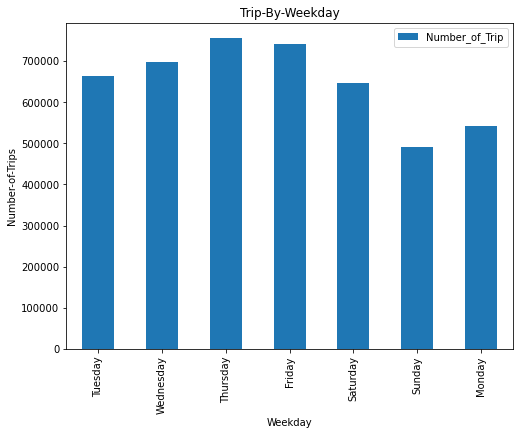

In [17]:
df_weekday.plot(kind='bar',figsize=(8,6))
plt.xlabel("Weekday")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Weekday")
plt.show()

In [18]:
max_number_trips_weekday=max(df_weekday['Number_of_Trip'])
#print(max_number_trips_hour)
max_trip=df_weekday[df_weekday['Number_of_Trip']==max_number_trips_weekday].index[0]
#print(max_hour)             
print("The highest number of trips is {} and the corresponding day is {}".format(max_number_trips_weekday,max_trip))

The highest number of trips is 755145 and the corresponding day is Thursday


In [19]:
min_number_trips_weekday=min(df_weekday['Number_of_Trip'])
#print(max_number_trips_hour)
min_trip=df_weekday[df_weekday['Number_of_Trip']==min_number_trips_weekday].index[0]
#print(max_hour)             
print("The lowest number of trips is {} and the corresponding day is {}".format(min_number_trips_weekday,min_trip))

The lowest number of trips is 490180 and the corresponding day is Sunday


### Trip by Day

In [25]:
df_day_grouped=df.groupby(['Day']).count()
df_day=pd.DataFrame({"Number_of_Trip":df_day_grouped.values[:,0]},index=df_day_grouped.index)
df_day.head()

,Number_of_Trip
Day,
1,127430
2,143201
3,142983
4,140923
5,147054


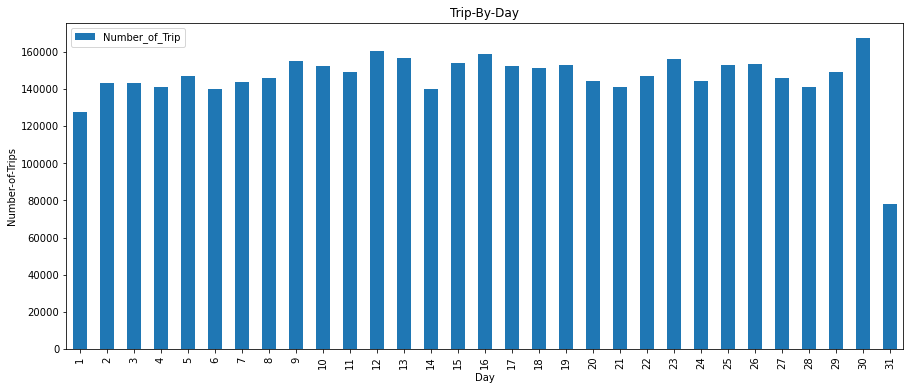

In [27]:
df_day.plot(kind='bar',figsize=(15,6))
plt.xlabel("Day")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Day")
plt.show()

<p>The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.</p>

In [28]:
df.head(2)

,Date/Time,Lat,Lon,Base,Month,Weekday,Day,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,April,Tuesday,1,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,April,Tuesday,1,0,17


### Trip by Hour Months

In [30]:
df_hour_month_grouped=df.groupby(['Hour','Month']).count()
df_hour_month=pd.DataFrame({"Number_of_Trip":df_hour_month_grouped.values[:,0]},df_hour_month_grouped.index)
df_hour_month.head(10)

Number_of_Trip
Hour Month                    
0    April               11910
     August              21451
     July                17953
     June                14514
     May                 13875
     September           24133
1    April                7769
     August              14471
     July                11527
     June                 9167

In [32]:
df_hour_month.reset_index(inplace=True)
df_hour_month.head()

,index,Hour,Month,Number_of_Trip
0,0,0,April,11910
1,1,0,August,21451
2,2,0,July,17953
3,3,0,June,14514
4,4,0,May,13875


In [37]:
data_hour_month=df_hour_month['Number_of_Trip'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [44]:
df_hour_month=pd.DataFrame(data=data_hour_month,index=df['Hour'].unique(),columns=df['Month'].unique())

In [45]:
df_hour_month.head()

,April,August,July,June,May,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


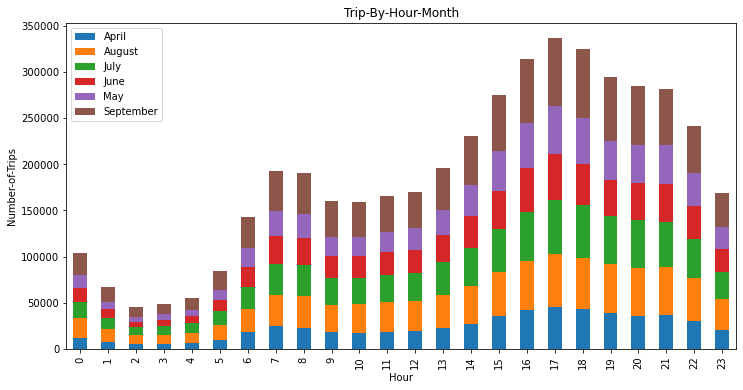

In [49]:
df_hour_month.plot(kind='bar',figsize=(12,6),stacked=True)
plt.xlabel("Hour")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Hour-Month")
plt.show()

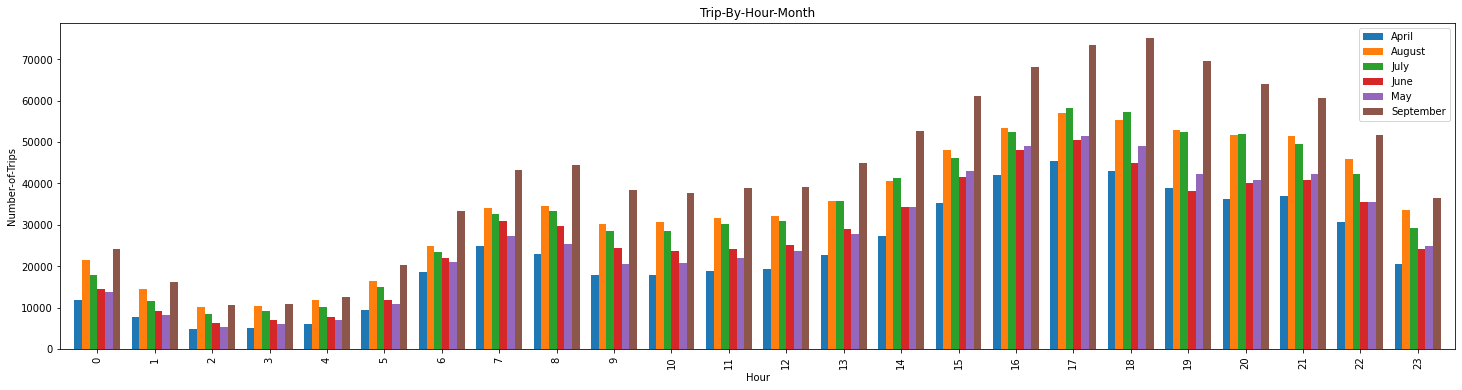

In [50]:
df_hour_month.plot(kind='bar',figsize=(25,6),width=0.8)
plt.xlabel("Hour")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Hour-Month")
plt.show()

### Trip weekday and Hour

In [51]:
df_weekday_hour_grouped=df.groupby(['Weekday','Hour']).count()
df_weekday_hour=pd.DataFrame({"Number_of_Trip":df_weekday_hour_grouped.values[:,0]},df_weekday_hour_grouped.index)
df_weekday_hour.head(10)

Number_of_Trip
Weekday Hour                
Friday  0              13716
        1               8163
        2               5350
        3               6930
        4               8806
        5              13450
        6              23412
        7              32061
        8              31509
        9              25230

In [52]:
df_weekday_hour.reset_index(inplace=True)
df_weekday_hour.head()

,Weekday,Hour,Number_of_Trip
0,Friday,0,13716
1,Friday,1,8163
2,Friday,2,5350
3,Friday,3,6930
4,Friday,4,8806


In [54]:
data_weekday_hour=df_weekday_hour['Number_of_Trip'].values.reshape(7,24)
df_weekday_hour=pd.DataFrame(data=data_weekday_hour,index=df['Weekday'].unique(),columns=df['Hour'].unique())
df_weekday_hour.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Tuesday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,...,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Wednesday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,...,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Thursday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,...,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Friday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,...,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Saturday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,...,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764


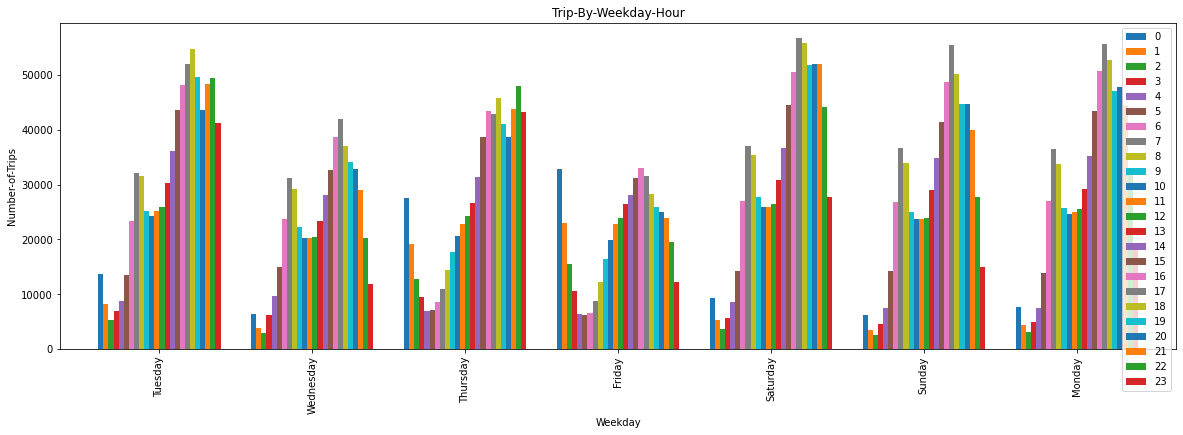

In [56]:
df_weekday_hour.plot(kind='bar',figsize=(20,6),width=0.8)
plt.xlabel("Weekday")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Weekday-Hour")
plt.show()

At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.

### Trip by weekday and month

In [57]:
df_weekday_month_grouped=df.groupby(['Weekday','Month']).count()
df_weekday_month=pd.DataFrame({"Number_of_Trip":df_weekday_month_grouped.values[:,0]},df_weekday_month_grouped.index)
df_weekday_month.head(10)

Number_of_Trip
Weekday Month                    
Friday  April               90303
        August             148674
        July               102735
        June               105056
        May                133991
        September          160380
Monday  April               60861
        August              91633
        July                93189
        June                94655

In [60]:
data_weekday_hour=df_weekday_month['Number_of_Trip'].values.reshape(6,7)
df_weekday_month=pd.DataFrame(data=data_weekday_hour,index=df['Month'].unique(),columns=df['Weekday'].unique())
df_weekday_month.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday
April,90303,148674,102735,105056,133991,160380,60861
August,91633,93189,94655,63846,137288,77218,132225
July,90260,81364,102990,162057,51251,110246,76327
June,79656,56168,116532,85067,124117,148439,115325
May,128921,153276,91185,107124,137454,88134,76662


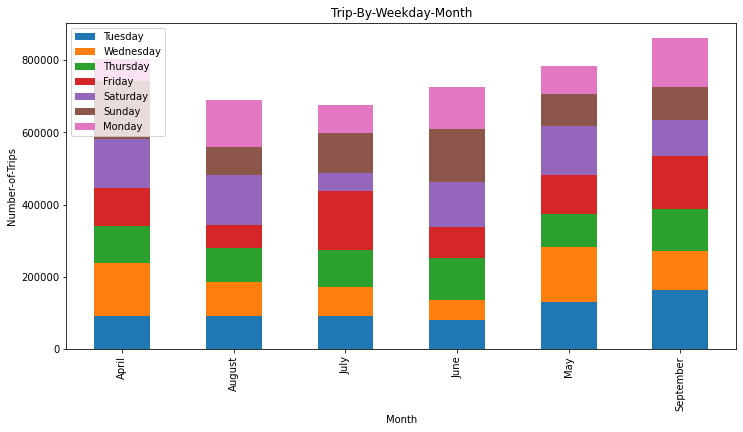

In [63]:
df_weekday_month.plot(kind='bar',figsize=(12,6),stacked=True)
plt.xlabel("Month")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Weekday-Month")
plt.show()

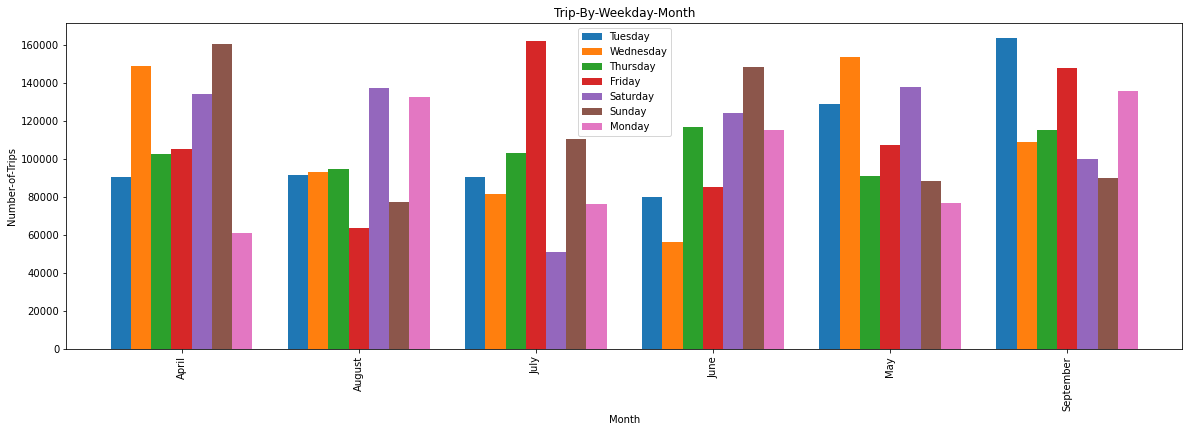

In [61]:
df_weekday_month.plot(kind='bar',figsize=(20,6),width=0.8)
plt.xlabel("Month")
plt.ylabel("Number-of-Trips")
plt.title("Trip-By-Weekday-Month")
plt.show()

# Heat Map

In [66]:
def count_rows(rows):
  return len(rows)

In [67]:
def heatmap(col1, col2):
  col_data = df.groupby([col1,col2]).apply(count_rows)
  heat_map_data=col_data.unstack()
  plt.figure(figsize=(15,8))
  return sns.heatmap(heat_map_data)  

<AxesSubplot:xlabel='Hour', ylabel='Day'>

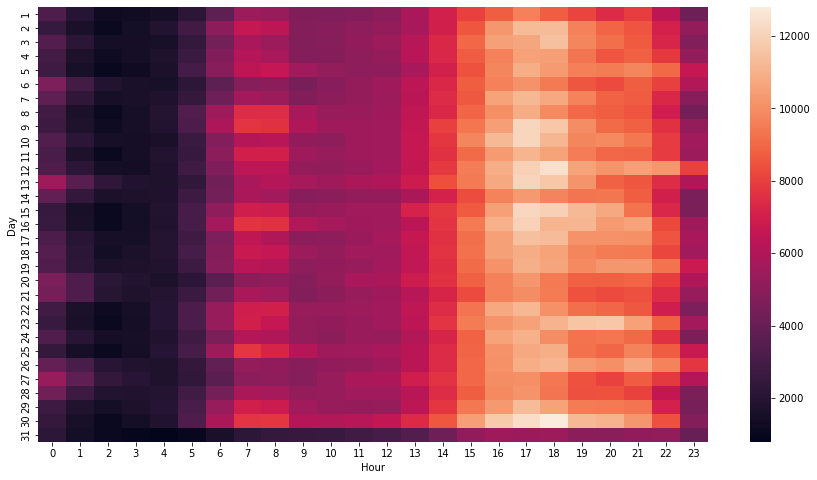

In [68]:
heatmap('Day','Hour')

<AxesSubplot:xlabel='Month', ylabel='Day'>

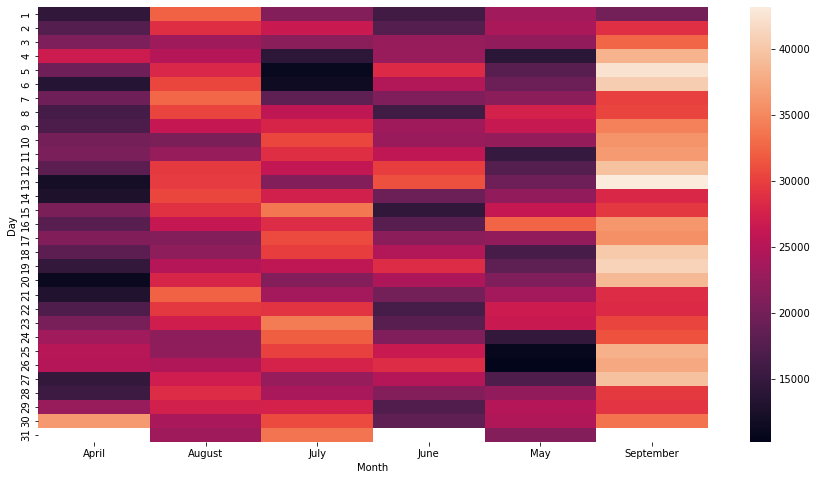

In [69]:
heatmap('Day','Month')

<AxesSubplot:xlabel='Month', ylabel='Weekday'>

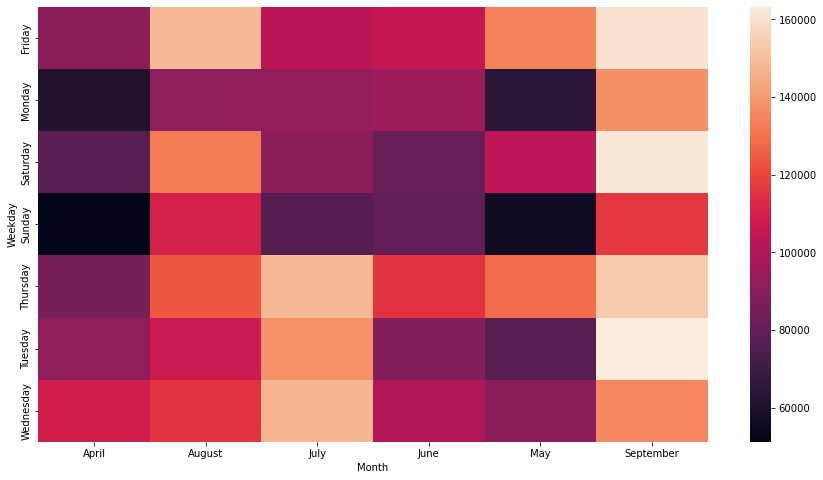

In [70]:
heatmap('Weekday','Month')

In [76]:
count=df['Hour'].value_counts()

In [78]:
# plt.figure(figsize=(12,8))
# sns.pointplot(x='Hour',y='count',hue='Weekday',data=df)